ARIMA aito regressive Integrated Moving average is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values

ARIMA models explain a time series based on its own past values, basically its own lands and the lagged forcast errors

ARIMA (Auto Regressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA models explain a time series based on its own past values, basically its own lags and the lagged forecast errors.

An ARIMA model is characterized by 3 terms p, d, q:
- p is the order of the AR term
- d is the number of differencing required to make the time series stationary
- q is the order of the MA term

As we see in the parameters required by the model, any stationary time series can be modeled with ARIMA models.

Let's explain the term Auto Regressive in ARIMA. It means the model is a linear regression that uses its own lags as predictors. Linear regression models, as we know, work best when the predictors are independent of each other. Otherwise we run into multicollinearity issues where the regression becomes unstable due to correlation.

Now most price series are non stationary otherwise we would all be rich by just buying low and selling high, waiting for the prices to mean revert.
So in order to make ARIMA models work we need to difference it, in this case to compute the returns as they usually randomly distribute around a 0 mean.

So we need to simply subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do that multiple times. 

And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model. If the time series is already stationary, then d is 0. But in stock price forecasting it's almost never 0.

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors. 
q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We'll use the Augmented Dickey Fuller (ADF) test to check if the price series is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value is greater than 0.05 we'll need to find the order of differencing.

So how to determine the right order of differencing?

The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the Autocorrelation Function plot reaches zero fairly quick.


In [ ]:
!pip install ipython

In [ ]:
!pip install ipython
import IPython

In [ ]:
!pip install nb_black

     |████████████████████████████████| 148 kB 5.2 MB/s 
     |████████████████████████████████| 743 kB 49.9 MB/s 
     |████████████████████████████████| 748 kB 53.3 MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=bf515027e5aaeefbdd700a2ab313ef7e97d5febf0e444c6d55d540c3907ef278
  Stored in directory: /root/.cache/pip/wheels/1e/b2/88/51c66d23ea5fd0d40ed50997555e15d981d92671376a9a412a
Successfully built nb-black
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

In [ ]:
from IPython.core.debugger import set_trace

#%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [ ]:
#df=pd.read_csv

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.2 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=8bf81f762d9d67cb2d1c1c29817411c9ecce52bb154effe4d00c6e28e6f99531
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Load the data set
import yfinance as yf
df = yf.download("GOOG", start="2019-06-03", end="2019-12-17")


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-03,1065.500000,1065.500000,1025.000000,1036.229980,1036.229980,5130600
2019-06-04,1042.900024,1056.050049,1033.689941,1053.050049,1053.050049,2833500
2019-06-05,1051.540039,1053.550049,1030.489990,1042.219971,1042.219971,2168400
2019-06-06,1044.989990,1047.489990,1033.699951,1044.339966,1044.339966,1703200
2019-06-07,1050.630005,1070.920044,1048.400024,1066.040039,1066.040039,1802400


In [ ]:
df=df[["Close"]].copy()

In [ ]:
df.describe()

,Close
count,138.000000
mean,1206.268045
std,79.759016
min,1036.229980
25%,1146.334961
50%,1206.840027
75%,1261.215027
max,1361.170044


An ARIMA model is characterised by 3 term (p,d,q):
*p is the oerder of the AR term
* d is the  number of differencing required to make the time series stationary
* q is the order of the MA term

Stationarity and  ADF test


In [ ]:
!pip install statsmodels 

In [ ]:
# Check if price series is staionary
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value:{result[0]}")

ADF Statistic: -0.2829784760895216
p-value:-0.2829784760895216


Autocorrelation Function (ACF)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

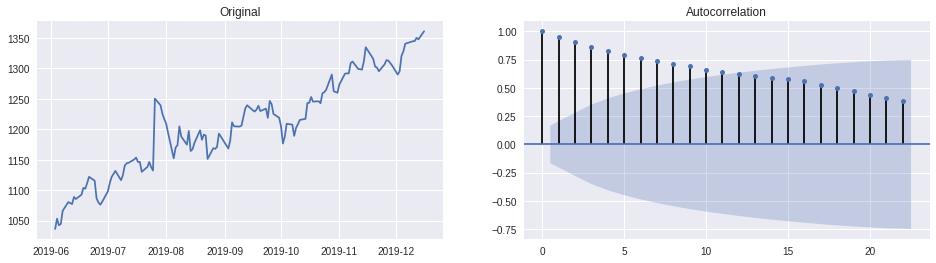

In [ ]:
fig, (ax1 , ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(df.Close)
ax1.set_title("Original")

#add; at the end of the plot function so that the plot is not duplicated
plot_acf(df.Close, ax=ax2);

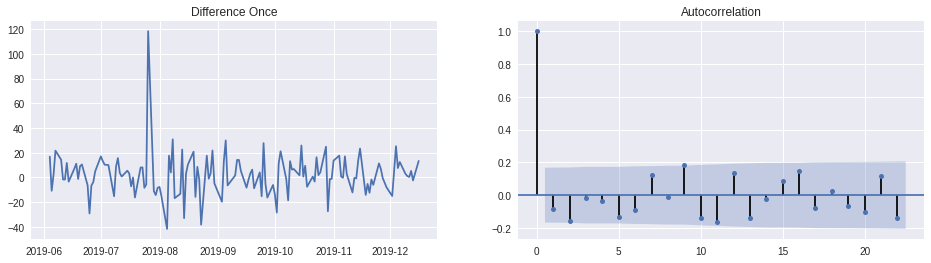

In [ ]:
diff = df.Close.diff().dropna()

fig, (ax1 , ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference Once")

#add; at the end of the plot function so that the plot is not duplicated
plot_acf(diff, ax=ax2);

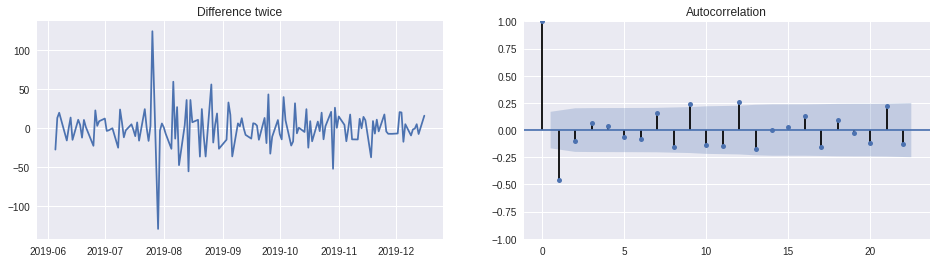

In [ ]:
diff = df.Close.diff().diff().dropna()

fig, (ax1 , ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")

#add; at the end of the plot function so that the plot is not duplicated
plot_acf(diff, ax=ax2);

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 31.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# we can use the pmdarima package to get the number of differencing
#! pip install --skip-lock pmdarima
from pmdarima.arima.utils import ndiffs

In [ ]:
#!pip3 install --user scipy==1.2.0

In [ ]:
#!pip install scipy 

In [ ]:
import pmdarima

p

p is the order of the Auto Regressive(AR) term. It refers to the number of lags to be used as predictors.

We can find out the required number of AR terms by inspecting the Partial Autocorrelation( PACF) plot.

The partial autocorrealtion represents the correlation between the series and its lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

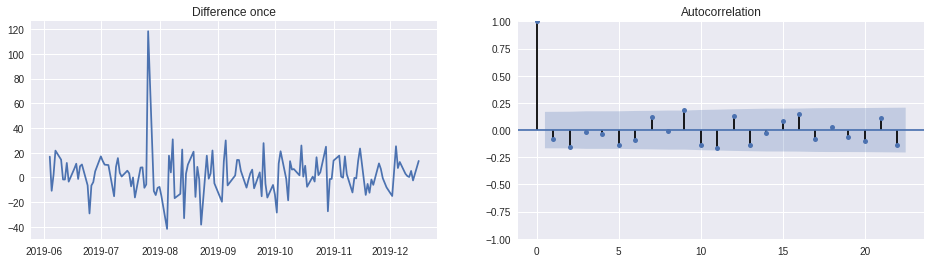

In [ ]:
diff = df.Close.diff().dropna()

fig, (ax1 , ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);


q

q is the order of the Moving Average(MA) term. It refers to the number of lagged forecase errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms.

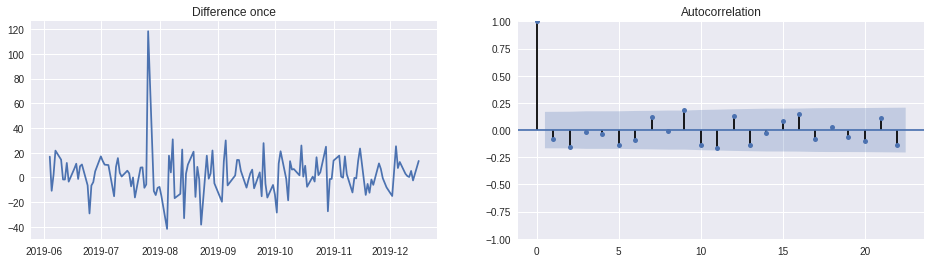

In [ ]:
diff = df.Close.diff().dropna()

fig, (ax1 , ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);


Fitting the ARIMA model

In [ ]:
df

,Close
Date,
2019-06-03,1036.229980
2019-06-04,1053.050049
2019-06-05,1042.219971
2019-06-06,1044.339966
2019-06-07,1066.040039
...,...
2019-12-10,1344.660034
2019-12-11,1345.020020
2019-12-12,1350.270020


In [ ]:
import statsmodels.tsa.arima.model as stats


In [ ]:
!pip install statsmodels --upgrade

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA

# ARIMA MODEL

model = stats.ARIMA(df.Close, order=(6, 1, 3))
#model_fit = model.fit()

#model= ARIMA(df.Close, order=(6,1,3))
#result= model.fit(disp=0)
result= model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('

In [ ]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  138
Model:                 ARIMA(6, 1, 3)   Log Likelihood                -575.883
Date:                Fri, 29 Oct 2021   AIC                           1171.767
Time:                        09:37:57   BIC                           1200.967
Sample:                             0   HQIC                          1183.633
                                - 138                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0062      0.317     -0.019      0.985      -0.628       0.616
ar.L2         -0.0328      0.327     -0.100      0.920      -0.674       0.609
ar.L3         -0.8981      0.281     -3.194      0.0

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.00935983],
        [0.00935983, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00935983, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.00935983, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00935983, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00935983, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([ -32.16595956,   74.67363444,  181.51322845,  288.35282245,
         395.19241645,  502.03201045,  608.87160446,  715.71119846,
         822.55079246,  929.39038647, 1036.22998047]),
 <a list of 138 Lists of Patches objects>)

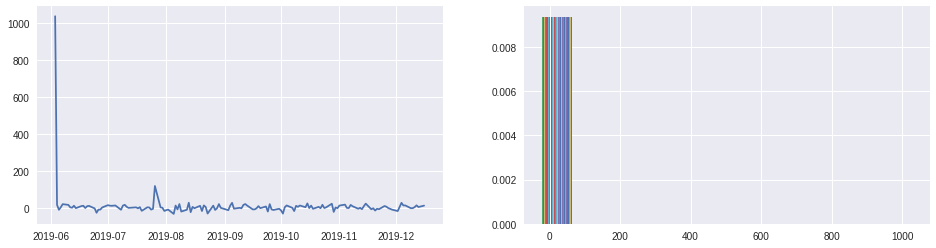

In [ ]:
# Plot residual errors
residuals=pd.DataFrame(result.resid)

fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

In [ ]:
result

In [ ]:
#Actual vs Fitted
result.plot_predict(
    start=1,
    end=60,
    dynamic=False,
)

AttributeError: ignored

In [ ]:
n=int(len(df)*0.8)

train=df.Close[:n]
test=df.Close[n:]

In [ ]:
print(len(train))
print(len(test))

110
28


In [ ]:
import statsmodels.tsa.arima.model as stats
model = stats.ARIMA(train, order=(6, 1, 3))
#model_fit = model.fit()

#model= ARIMA(train, order=(6,1,3))
#result= model.fit(disp=0)
result= model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  110
Model:                 ARIMA(6, 1, 3)   Log Likelihood                -464.865
Date:                Fri, 29 Oct 2021   AIC                            949.730
Time:                        10:09:23   BIC                            976.644
Sample:                             0   HQIC                           960.645
                                - 110                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0431      0.462      0.093      0.926      -0.863       0.949
ar.L2         -0.1155      0.469     -0.246      0.806      -1.035       0.804
ar.L3         -0.7778      0.430     -1.810      0.070      -1.620       0.064
ar.L4         -0.1577      0.157     -1.001      0.317      -0.466       0.151
ar.L5         -0.1928      0.241     -0.799      0.424      -0.666       0.280
ar.L6         -0.0865      0.117     -0.741      0.459      -0.315       0.142
ma.L1         -0.2013      0.453     -0.445      0.657      -1.088       0.686
ma.L2          0.0122      0.499      0.024      0.981      -0.967       0.991
ma.L3          0.8681      0.477      1.819      0.069      -0.067       1.803
sigma2       281.3682     27.768     10.133      0.000     226.944     335.793
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1658.43
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             2.72
Prob(H) (two-sided):                  0.31   Kurtosis:                        21.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
step=30

fc, se, conf = result.forecast(step)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: ignored

In [ ]:
fc=pd.Series(fc, index=test[:step].index)
lower=pd.Series(conf[:,0], index=test[:step].index)
upper=pd.Series(conf[:,1], index=test[:step].index)

TypeError: ignored

NameError: ignored

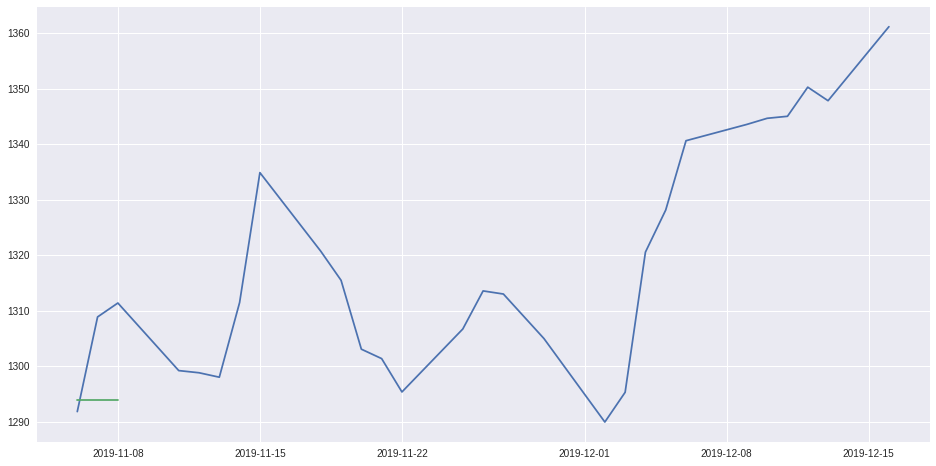

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecase vs Actual")
plt.legend(loc="upper left")